#Normalize count metric (cnt column) from the daily dataset to average hourly 
# so they can be used in conjunction with the hourly data
NORM_DAILY_TO_AVERAGE_HOURLY = 1./24. 

In [233]:
# Rachel's part
import pandas as pd

#Load the dataset
hour_df = pd.read_csv('EDA\hour.csv')

#Rename 'cnt' column to 'count'
hour_df.rename(columns={'cnt': 'count'}, inplace=True)
hour_df.rename(columns={'yr': 'year'}, inplace=True)
hour_df.rename(columns={'mnth': 'month'}, inplace=True)
hour_df.rename(columns={'hr': 'hour'}, inplace=True)
hour_df.rename(columns={'temp': 'temperature'}, inplace=True)
hour_df.rename(columns={'dteday': 'date'}, inplace=True)
hour_df.rename(columns={'weathersit': 'weather'}, inplace=True)
hour_df.rename(columns={'hum': 'humidity'}, inplace=True)

#List of irrelevant columns for analysis
columns_to_exclude_from_analysis = ['holiday', 'workingday', 'atemp', 'casual', 'registered']

#Keep all columns in the DataFrame but exclude the ones from analysis
hour_df_cleaned = hour_df.drop(columns=columns_to_exclude_from_analysis)

#Check for missing values
print(hour_df_cleaned.isnull().sum())

#Drop rows with missing values (if any)
hour_df_cleaned.dropna(inplace=True)

#Check for duplicates and drop them
hour_df_cleaned.drop_duplicates(inplace=True)

#IQR for hourly data (only for 'count' column)
Q1_hour = hour_df_cleaned['count'].quantile(0.25)
Q3_hour = hour_df_cleaned['count'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['count'] >= (Q1_hour - 1.5 * IQR_hour)) & (hour_df_cleaned['count'] <= (Q3_hour + 1.5 * IQR_hour))]

#Save the cleaned data to a new CSV file with all columns included
hour_df_cleaned.to_csv('cleaned_hourly_bike_data.csv', index=False) 

instant        0
date           0
season         0
year           0
month          0
hour           0
weekday        0
weather        0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64


In [234]:
# Ken's part
# Librarier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Load csv file from GitHub into a DataFrame
df = pd.read_csv('cleaned_hourly_bike_data.csv')

# Check top 3 rows of DataFrame
df.head(3)

,instant,date,season,year,month,hour,weekday,weather,temperature,humidity,windspeed,count
0,1,2011-01-01,1,0,1,0,6,1,0.24,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,6,1,0.22,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,6,1,0.22,0.80,0.0,32


In [236]:
# Check number of rows and columns
df.shape

(16874, 12)

In [237]:
# Check column names and types
df.info()

# 'dteday' column is a string, which will need to be converted to datetime if using date in calculations
# Columns 'temp', 'atemp', 'hum', and 'windspeed' are floats
# The remaining columns are all integers
# This dataset does not have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16874 entries, 0 to 16873
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      16874 non-null  int64  
 1   date         16874 non-null  object 
 2   season       16874 non-null  int64  
 3   year         16874 non-null  int64  
 4   month        16874 non-null  int64  
 5   hour         16874 non-null  int64  
 6   weekday      16874 non-null  int64  
 7   weather      16874 non-null  int64  
 8   temperature  16874 non-null  float64
 9   humidity     16874 non-null  float64
 10  windspeed    16874 non-null  float64
 11  count        16874 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [238]:
# Check summary stats (also checking for outliers)
df.describe()

# Some observations: there is a significant difference between the number of 'casual' and 'registered' users, seen when comparing min/max and the percentile groupings.
# Column 'weekday' has integeres between 0-6, so week starts at 0
# Column 'weathersit' has no rows that are '4', meaning there was no 'Heavy Rain' during the entire time period of the dataset
# Column 'cnt' min in 22, and max is 8714, meaning significant fluctuation of total rental bikes throughout time period
# No outliers spotted, as all columns make sense in regards to the numbers inputted and what ethe column represents

,instant,season,year,month,hour,weekday,weather,temperature,humidity,windspeed,count
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,2.997748,1.430663,0.492650,0.630412,0.189619,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,2.013054,0.642689,0.192455,0.192600,0.122460,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,1.000000,1.000000,0.340000,0.480000,0.104500,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,3.000000,1.000000,0.500000,0.630000,0.179100,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,5.000000,2.000000,0.640000,0.790000,0.253700,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,6.000000,4.000000,1.000000,1.000000,0.850700,642.000000


In [239]:
# Check if any duplicates
df.duplicated().sum()

# No duplicates

0

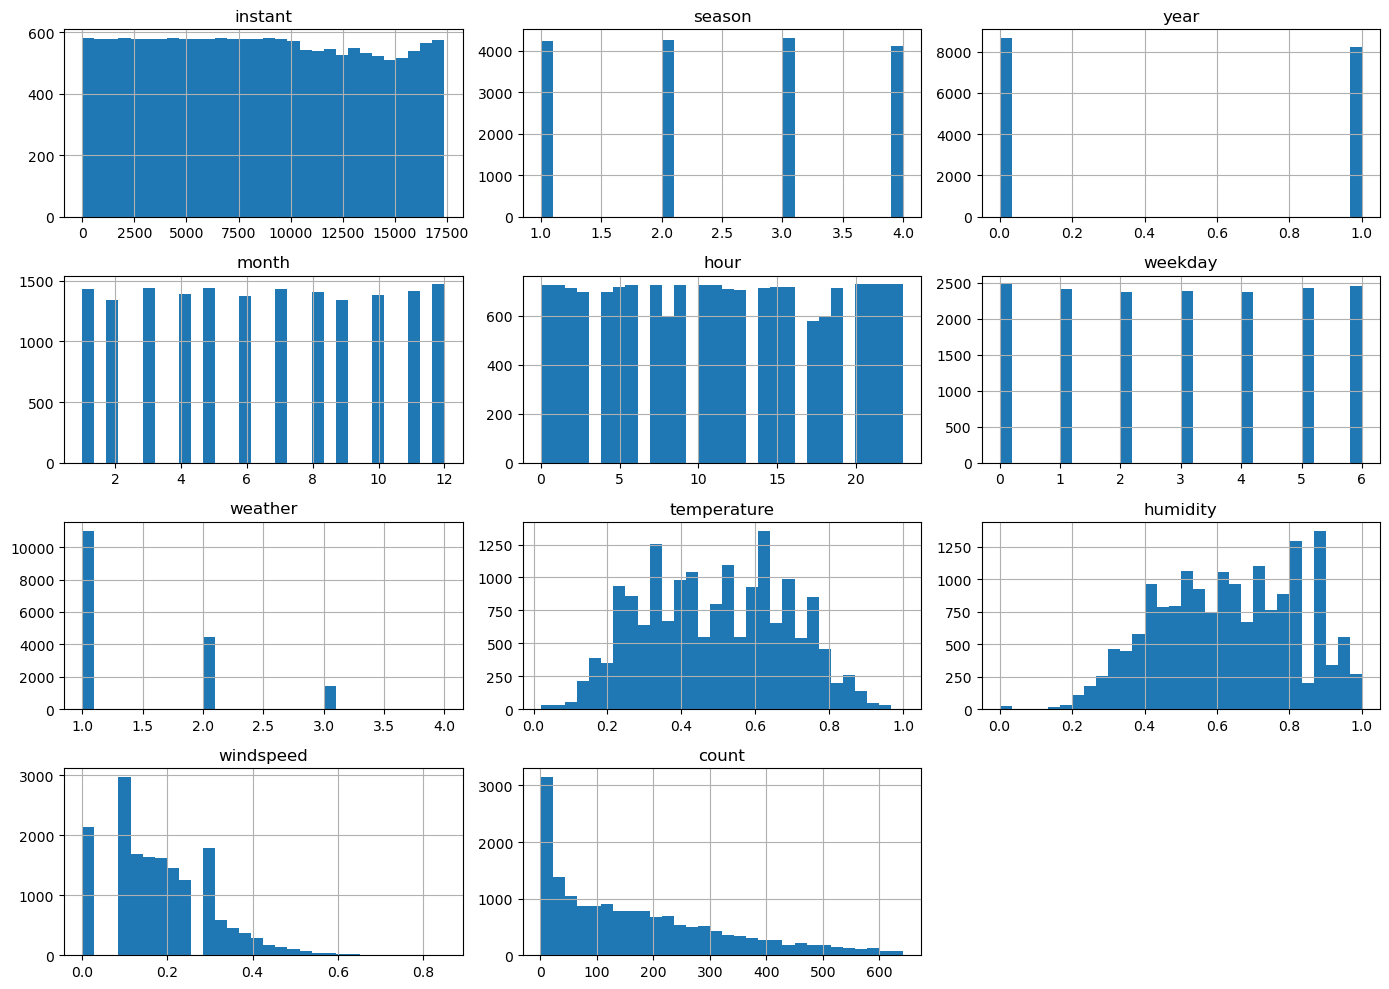

In [240]:
# Check and visualize distribution of features
df.hist(figsize=(14, 10), bins=30)  
# prevent overlap
plt.tight_layout() 
plt.show()

# Some observations: most common weather type was '1' for clear, followed by '2' for misty which occurred about half the time as '1', very few '3' for light snow, and no '4' at all for heavy rain.
# Significantly more 'registered' users

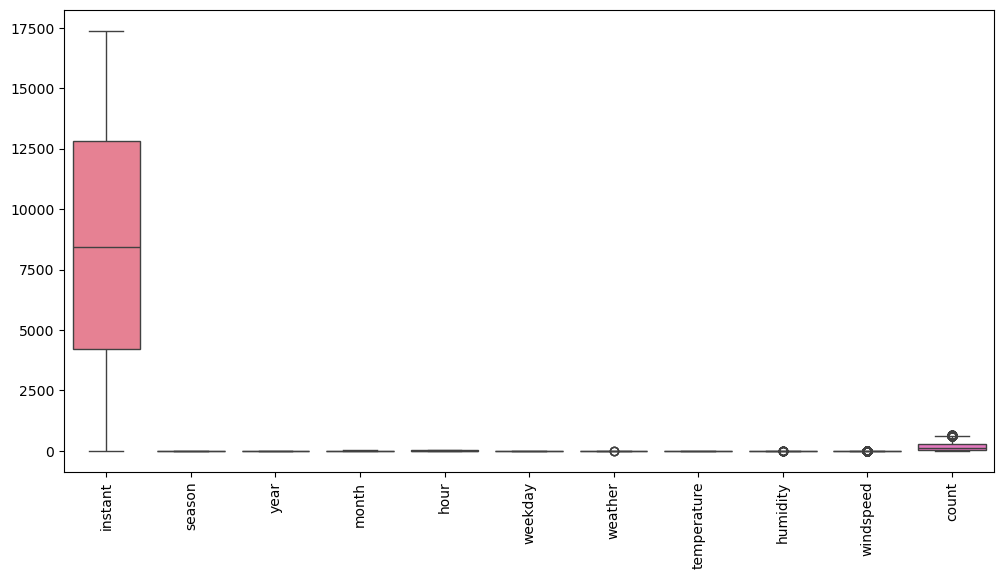

In [241]:
# Visualizing and detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# 'casual' column shows a large number of outliers, which most likely means there are certain times when these casual users are renting bikes more often, which makes the fluctuations
# wider than the 'registered' users.

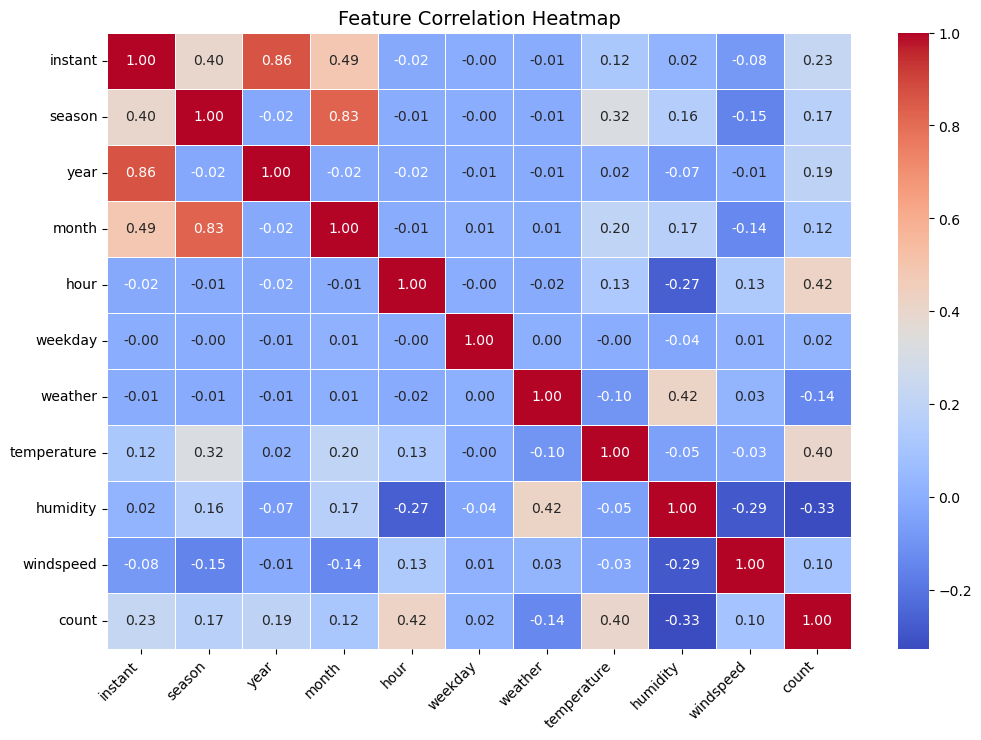

In [242]:
# Correlation matrix to check relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["date"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Initial observations: season, year, weathersit, temp, atemp, and windspeed affect the number of rentals ('cnt')

In [243]:
# Efren's part
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('cleaned_hourly_bike_data.csv')

# Define features and target
X = data.drop(columns=['count'])  # Predictors
y = data['count']  # Target variable

# Identify categorical and numerical columns
categorical_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather']
numerical_features = ['temperature', 'humidity', 'windspeed']

# Outlier Detection for the target variable y
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# outliers in y
outliers = (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))


# Remove outliers from y and the corresponding rows in X
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X_cleaned[categorical_features])

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_cleaned[numerical_features])

# Combine transformed features
X_transformed = np.hstack((X_num, X_cat))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_cleaned, test_size=0.2, random_state=42)


# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - R² Score: {r2}")
    print()

# Train and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
evaluate_model(y_test, y_pred_linear, "Linear Regression")


Linear Regression Metrics:
  - Mean Squared Error (MSE): 7595.539906591066
  - Mean Absolute Error (MAE): 65.31422982594145
  - R² Score: 0.6695461297172995



In [244]:
# Saleha's part
# Since the performance of the model isn't satisfactory, we'll try Decision Tree Regressor and Random Forest Regression models.

# Train and evaluate Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
evaluate_model(y_test, y_pred_tree, "Decision Tree Regressor")

# Train and evaluate Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
evaluate_model(y_test, y_pred_forest, "Random Forest Regressor")

Decision Tree Regressor Metrics:
  - Mean Squared Error (MSE): 5170.949298088411
  - Mean Absolute Error (MAE): 43.36544205495819
  - R² Score: 0.7750311064647104

Random Forest Regressor Metrics:
  - Mean Squared Error (MSE): 2664.211293835009
  - Mean Absolute Error (MAE): 32.660611011549186
  - R² Score: 0.8840900128067671



The Random Forest Regressor seems to be the best-performing model for this dataset, achieving the lowest error (MSE = 2690.36, MAE = 30.89) and the highest explanatory power (R² = 0.88). 

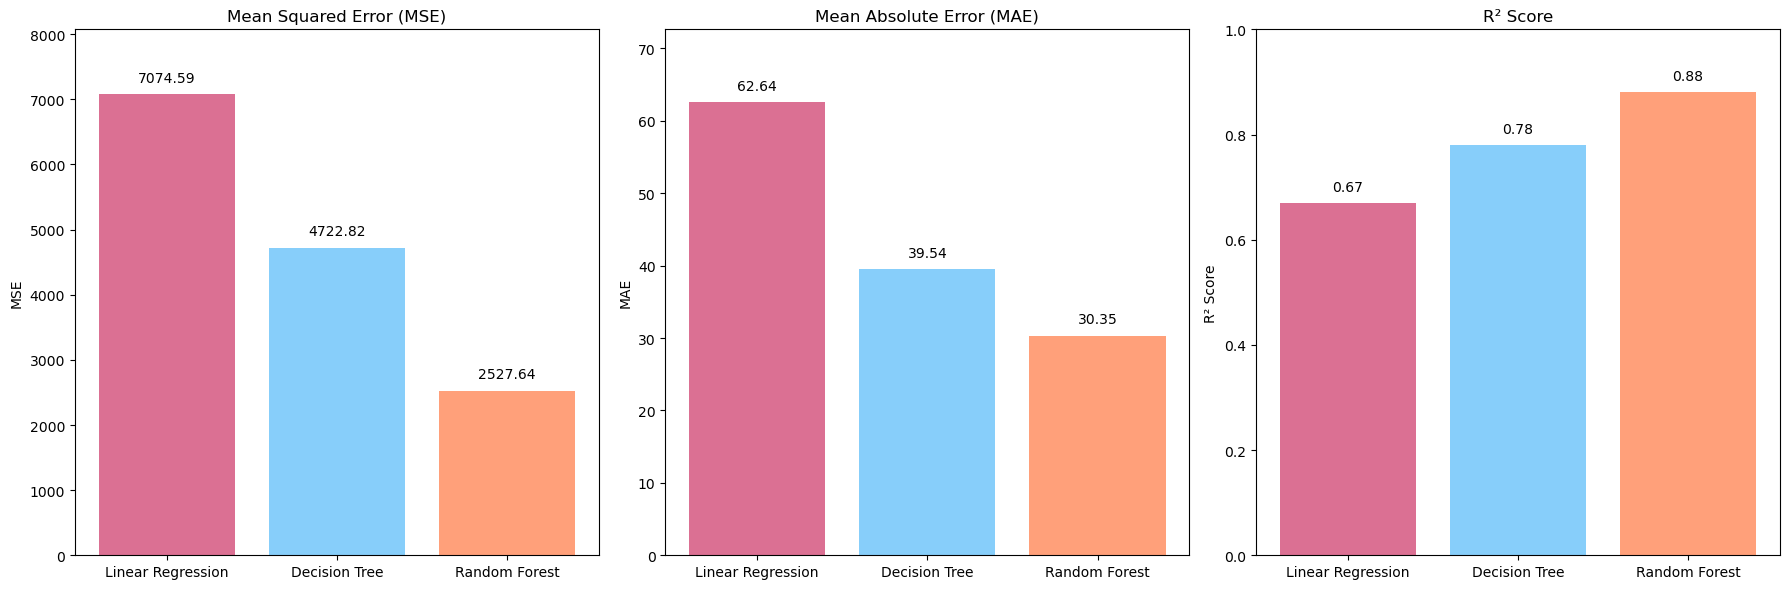

In [245]:
# creating bar plots to visually compare the performance of the Linear Regression, Decision Tree Regressor, and Random Forest Regressor models

# Metrics for each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [7074.59, 4722.82, 2527.64]
mae_scores = [62.64, 39.54, 30.35]
r2_scores = [0.67, 0.78, 0.88]

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
axes[0].bar(models, mse_scores, color=['palevioletred', 'lightskyblue', 'lightsalmon'])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')
axes[0].set_ylim(0, max(mse_scores) + 1000)  # Adjust y-axis limit for better visualization

# Plot MAE
axes[1].bar(models, mae_scores, color=['palevioletred', 'lightskyblue', 'lightsalmon'])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae_scores) + 10)  # Adjust y-axis limit for better visualization

# Plot R² Score
axes[2].bar(models, r2_scores, color=['palevioletred', 'lightskyblue', 'lightsalmon'])
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score')
axes[2].set_ylim(0, 1)  # R² Score ranges from 0 to 1

# Add value labels on top of each bar
for i, ax in enumerate(axes):
    for j, v in enumerate([mse_scores, mae_scores, r2_scores][i]):
        ax.text(j, v + 0.02 * max([mse_scores, mae_scores, r2_scores][i]), 
                f'{v:.2f}', ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

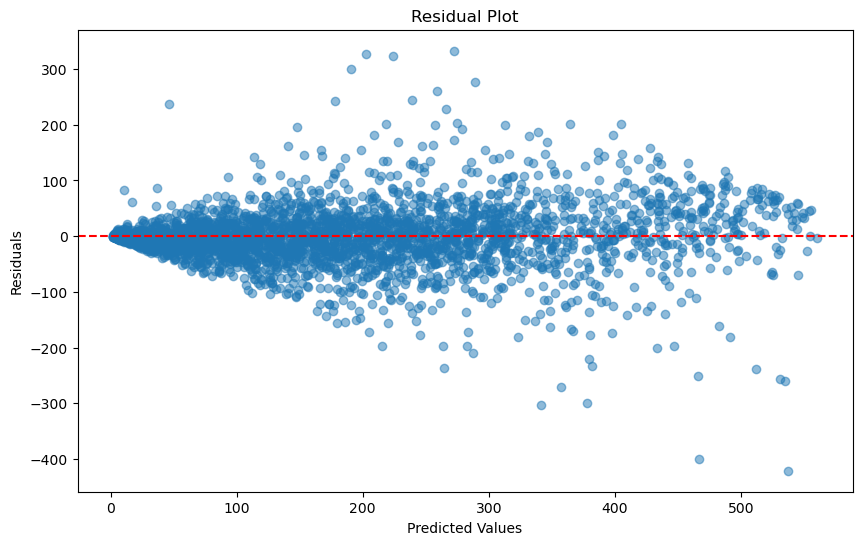

In [246]:
# Residual analysis:  Identifying patterns in the errors to improve the model.
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_forest

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_forest, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot indicates that the model has room for improvement, particularly in handling higher bike rental counts and reducing heteroscedasticity. By hyperparameter tuning, and cross-validation, we can build a more robust and accurate model.

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: -2.508236631780116

Best Model Performance on Test Set:
  - Mean Squared Error (MSE): 2664.476382352325
  - Mean Absolute Error (MAE): 32.69005922275322
  - R² Score: 0.8840784797850739


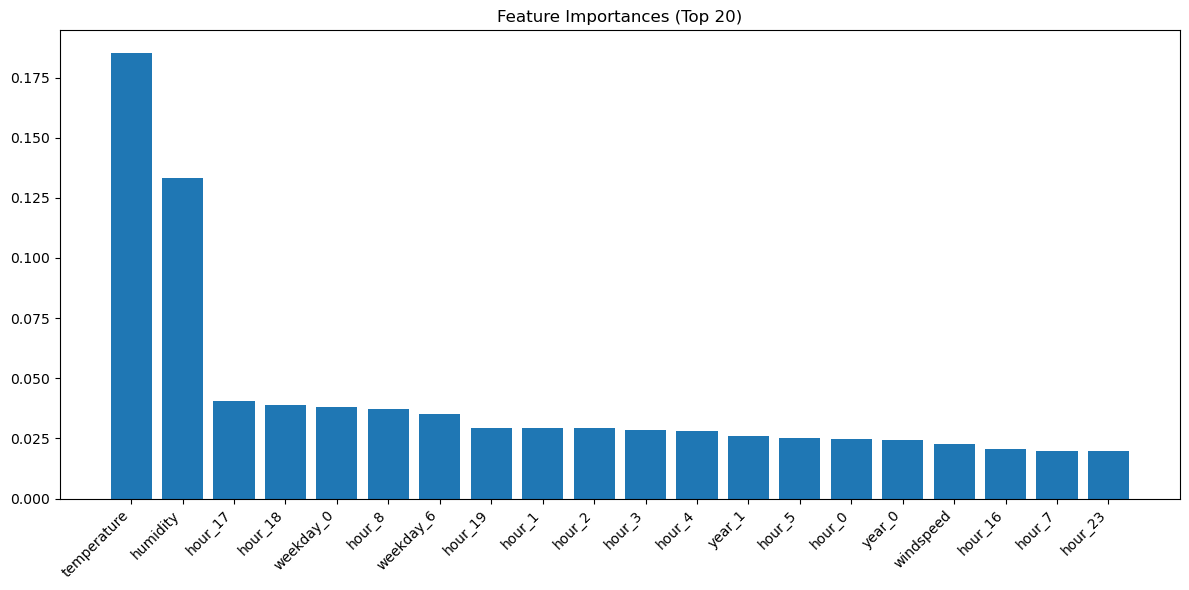

In [247]:
# Daniel's part

# Add hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create custom scorer that returns multiple metrics
def custom_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return r2 - (0.1 * mae)  # GridSearchCV will optimize for a combination of r2 and mean absolute error score

# Initialize Random Forest model for grid search
rf_grid = RandomForestRegressor(random_state=42)

# Perform grid search with 5-fold cross validation
grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Get predictions using best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate best model
print("\nBest Model Performance on Test Set:")
print(f"  - Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_best)}")
print(f"  - Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_best)}")
print(f"  - R² Score: {r2_score(y_test, y_pred_best)}")

# Plot feature importances
feature_names = numerical_features + [f"{feat}_{val}" for feat, vals in 
                                    zip(categorical_features, encoder.categories_) 
                                    for val in vals]
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Top 20)")
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
plt.tight_layout()
plt.show()